In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notbook_mode, plot, iplot
# init_notbook_mode(connected=True)
cf.go_offline()

import requests
from bs4 import BeautifulSoup
import json

# Get data from URL

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Coronavirus Update (Live): 102,848,781 Cases and 2,221,733 Deaths from COVID-19 Virus Pandemic - Worldometer
  </title>
  <meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x
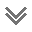

In [7]:
web_page = requests.get("https://www.worldometers.info/coronavirus")
soup = BeautifulSoup(web_page.text, 'html.parser')
print(soup.prettify())

In [8]:
covid_data = soup.find_all("div", class_="maincounter-number")
print("Coronavirus Total Cases: ", covid_data[0].text.strip())
print("Total Deaths: ", covid_data[1].text.strip())
print("Recovered Cases: ", covid_data[2].text.strip())
data = soup.find_all("script", {"type": "text/javascript"})
for content in data:
    print(content)


Coronavirus Total Cases:  102,848,781
Total Deaths:  2,221,733
Recovered Cases:  74,515,635
<script src="https://cdn.datatables.net/1.10.19/js/jquery.dataTables.min.js" type="text/javascript"></script>
<script src="https://cdn.datatables.net/1.10.19/js/dataTables.bootstrap.min.js" type="text/javascript"></script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
    $('#example2').dataTable( {
        "scrollCollapse": true,
		"sDom": '<"bottom"flp><"clear">',
        "paging":         false
    } );
} );
	</script>
<script class="init" type="text/javascript">
		$.extend( $.fn.dataTable.defaults, {
    responsive: true
} );
	
	$(document).ready(function() {
    $('#table3').dataTable( {
        "scrollCollapse": true,
				 "order": [[ 1, 'desc' ]],
		"sDom": '<"bottom"flp><"clear">',
        "paging":         false
    } );
} );
	</script>
<script class="init" type="text/javascript">
		$.exten

In [9]:
results = soup.find(id='main_table_countries_today')
content = results.find_all('td')
# content

In [10]:
clean_data = ""
for data in content:
    clean_data += data.text.strip() + '|'
    clean_data = clean_data.replace("+", "")
    clean_data = clean_data.replace("N/A", "0")
# clean_data

In [11]:
import re
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]
for c in countries:
    pattern = c + "[,|\d]*"
    data = re.search(pattern, clean_data, re.IGNORECASE)
    if data is not None:
        print(data.group())
    

USA|26,527,226|15,033|447,773|314|16,205,665|6,093|9,873,788|24,976|79,870|1,348|308,472,477|928,771|332,129,757|
Spain|2,830,478||58,319||0|0|0|4,723|60,525|1,247|32,027,728|684,861|46,765,327|
Italy|2,541,783|12,715|88,279|421|1,990,152|16,764|463,352|2,218|42,076|1,461|32,453,362|537,219|60,409,984|
France|3,153,487||75,620||223,174||2,854,693|3,130|48,250|1,157|43,339,479|663,113|65,357,560|
Germany|2,210,192|2,799|57,255|203|1,911,800|13,000|241,137|4,437|26,331|682|38,533,736|459,064|83,939,751|
UK|3,796,088|23,275|105,571|1,200|1,673,936||2,016,581|3,832|55,748|1,550|71,677,362|1,052,637|68,093,162|
Turkey|2,470,901|6,871|25,865|129|2,355,409|7,100|89,627|1,692|29,116|305|29,495,004|347,554|84,864,495|
Iran|1,411,731|6,317|57,889|82|1,202,893|6,519|150,949|3,964|16,684|684|9,230,376|109,087|84,614,581|
Russia|3,832,080|19,032|72,697|512|3,279,964|24,502|479,419|2,300|26,252|498|101,500,000|695,344|145,970,912|
Brazil|9,130,790|11,313|222,926|151|7,960,643||947,221|8,318|42,780|1

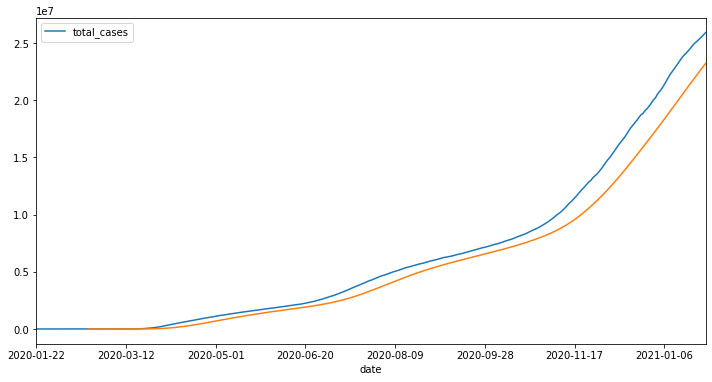

In [13]:
owid_df = pd.read_csv('owid-covid-data.csv')
# owid_df.columns
country_df = owid_df.location.unique()
country_df.size

indexer = owid_df[owid_df['location'] == 'United States'].index
us_tc = owid_df.loc[indexer, 'date': 'total_cases']
us_tc = us_tc.dropna()
us_tc.set_index('date', inplace=True)
us_tc.plot(figsize=(12, 6))
us_tc.rolling(window=30).mean()['total_cases'].plot()

# Does lockdown work?

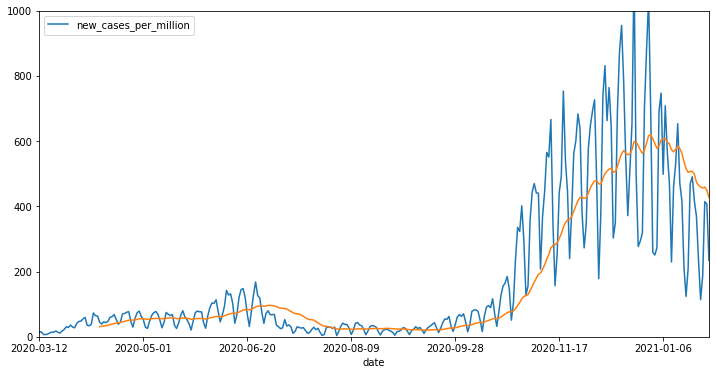

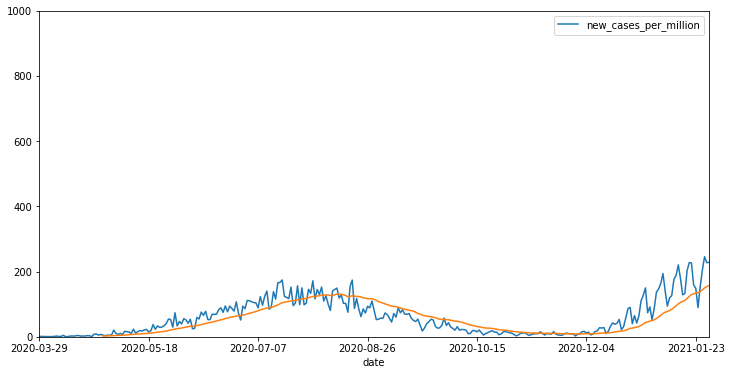

In [21]:
def plot_covid_data(country, col, y_max=1000, plot_ma=True):
    indexer = owid_df[owid_df['location'] == country].index
    country_df = owid_df.loc[indexer, 'date': col]
    country_df = country_df.dropna()
    country_df.set_index('date', inplace=True)
    country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
    country_df.plot(figsize=(12, 6), ylim=[0, y_max])
    if plot_ma:
        country_df.rolling(window=30).mean()[col].plot()
plot_covid_data('Sweden', 'new_cases_per_million')
plot_covid_data('Bolivia', 'new_cases_per_million')

# How does median age effect death rate?

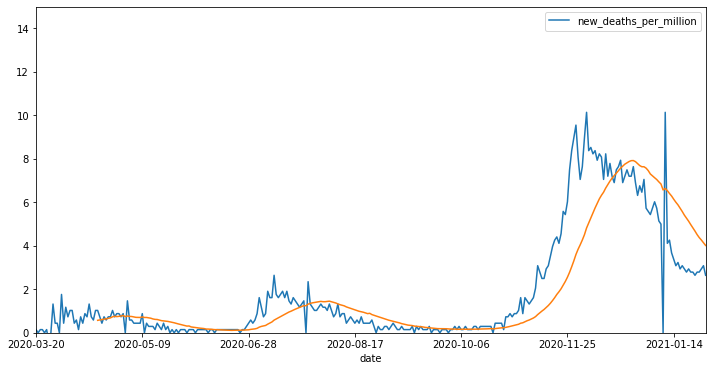

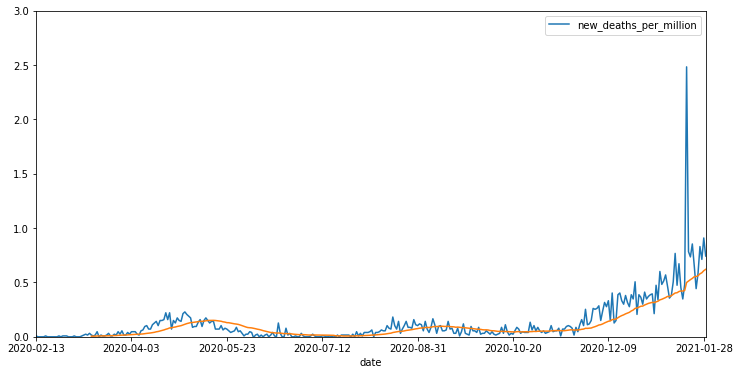

In [25]:
plot_covid_data('Serbia', 'new_deaths_per_million', 15)
plot_covid_data('Japan', 'new_deaths_per_million', 3)

# obesity effect on death rate

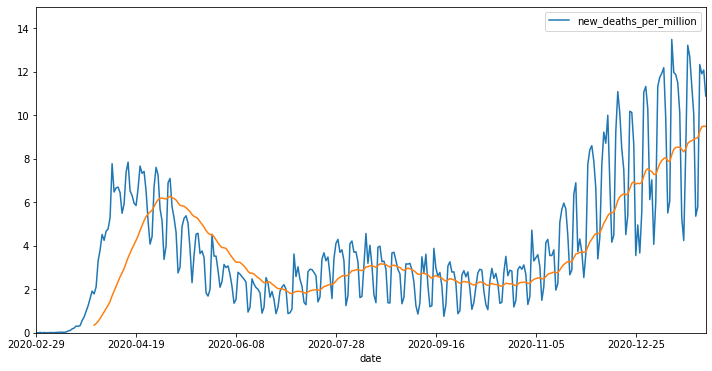

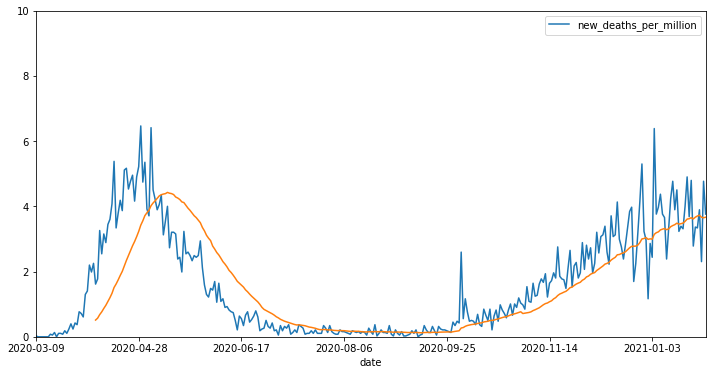

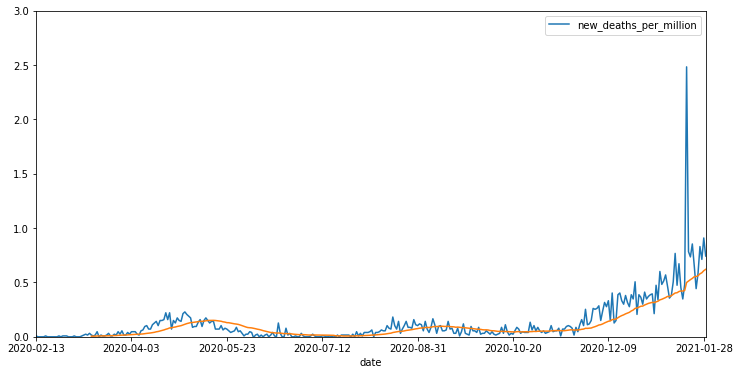

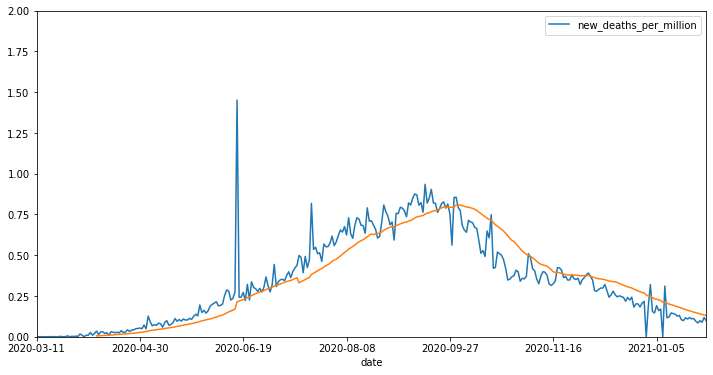

In [29]:
plot_covid_data('United States', 'new_deaths_per_million', 15)
plot_covid_data('Canada', 'new_deaths_per_million', 10)
plot_covid_data('Japan', 'new_deaths_per_million', 3)
plot_covid_data('India', 'new_deaths_per_million', 2)

# how does testing slow death rate?

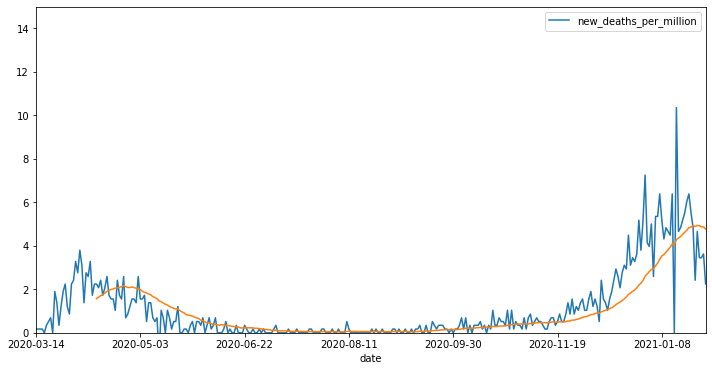

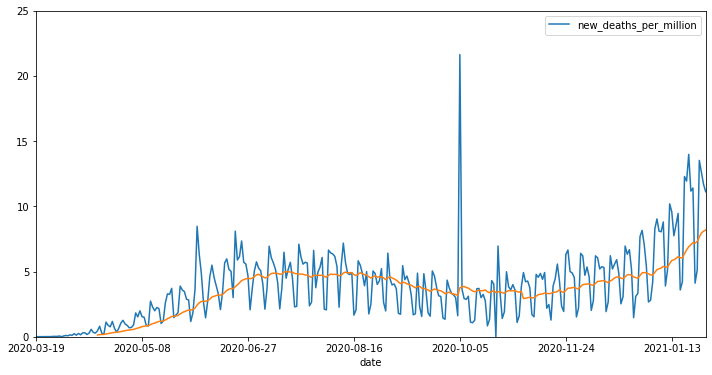

In [34]:
plot_covid_data('Denmark', 'new_deaths_per_million', 15)
plot_covid_data('Mexico', 'new_deaths_per_million', 25)

In [38]:
def scatter_plot(date, col1, col2):
    total_df = pd.DataFrame(columns=['date', 'location', col1, col2])
    for c in country_df:
        temp_df = owid_df[(owid_df['location'] == c) &
                         (owid_df['date'] == date)][['date', 'location', col1, col2]]
        total_df = total_df.append(temp_df, ignore_index=True).fillna(0)
    total_df.set_index('date', inplace=True)
    fig = px.scatter(data_frame=total_df, x=col2, y=col1, color='location', trendline='ols', 
                    hover_data=['location'])
    fig.show()
    return total_df

scatter_plot('2020-10-17', 'total_deaths_per_million', 'aged_70_older')

location  total_deaths_per_million  aged_70_older
date                                                            
2020-10-17  Afghanistan                    38.275          1.337
2020-10-17      Albania                   155.674          8.643
2020-10-17      Algeria                    42.097          3.857
2020-10-17      Andorra                   763.606          0.000
2020-10-17       Angola                     7.333          1.362
...                 ...                       ...            ...
2020-10-17      Vietnam                     0.360          4.718
2020-10-17        World                   142.527          5.355
2020-10-17        Yemen                    19.983          1.583
2020-10-17       Zambia                    18.821          1.542
2020-10-17     Zimbabwe                    15.542          1.882

[189 rows x 3 columns]